# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [ ]:
# <Student to fill this section>


---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Nian-Ya, Weng"
student_id = "25176165"
group_id = "30"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to assist NBA teams in identifying college basketball players who are most likely to be drafted. By building a predictive model using historical player statistics, teams can make more informed scouting decisions and better allocate their resources. This tool can also support media and fan engagement platforms that predict player drafts, enhancing audience interaction and content value.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [11]:
# <Student to fill this section>
business_objectives = """
Accurate predictions can significantly improve the efficiency and success of NBA teams' draft strategies by identifying high-potential players early, reducing scouting costs, and increasing the return on investment in drafted players. It can also enhance fan engagement and media analytics products by providing more reliable draft forecasts.

On the other hand, incorrect predictions may lead to poor draft choices, missed opportunities to recruit strong players, wasted resources on ineffective scouting, and reduced confidence in analytics-driven decision-making within the organization.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [17]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results of the predictions will be used to support NBA team management, scouts, and analysts in making informed draft decisions. The primary users of the predictions will be the team's data analytics departments and decision makers involved in the player selection process.

Other stakeholders impacted by the predictions include players whose draft chances and career opportunities may be affected, media platforms that use such data for public draft forecasts, and fans who follow and engage with draft related content. Accurate predictions are expected to improve trust in analytics and enhance engagement across these stakeholders.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [19]:
# <Student to fill this section>
# <Student to fill this section>

import os
import pandas as pd
from pathlib import Path

# check if you are in the Colab environment
IN_COLAB = "google.colab" in str(get_ipython())

# automatically set the path
if IN_COLAB:
    from google.colab import files
    print("Colab detected. Please upload your 'train.csv' and 'test.csv' files.")
    uploaded = files.upload()
    PATH_TRAIN = "train.csv"
    PATH_TEST = "test.csv"
else:
    PATH_TRAIN = Path("data/raw/train.csv")
    PATH_TEST = Path("data/raw/test.csv")

# load data
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

# show basic information
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Columns in Train:", train.columns.tolist())

# display data
display(train.head())

Colab detected. Please upload your 'train.csv' and 'test.csv' files.


Saving test.csv to test.csv
Saving train.csv to train.csv
Train shape: (14774, 62)
Test shape: (1297, 61)
Columns in Train: ['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'porpag', 'adjoe', 'pfr', 'year', 'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'player_id', 'drafted']


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0


In [20]:
# Check the number of missing values

missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

# Show columns with missing values
print("Train missing fields")
display(missing_train[missing_train > 0])

print("Test missing fields")
display(missing_test[missing_test > 0])

Train missing fields


,0
ht,8
Rec_Rank,9885
ast_tov,1535
rimmade,2075
rimmade_rimmiss,2075
midmade,2075
midmade_midmiss,2075
rim_ratio,3203
mid_ratio,3191
dunksmade,2075


Test missing fields


,0
ht,6
Rec_Rank,894
ast_tov,125
rimmade,61
rimmade_rimmiss,61
midmade,61
midmade_midmiss,61
rim_ratio,178
mid_ratio,196
dunksmade,61


In [21]:
import numpy as np

# Delete fields with too high a missing value ratio (cannot be filled)
cols_to_drop = ['Rec_Rank', 'dunks_ratio', 'ht']
train = train.drop(columns=cols_to_drop, errors='ignore')
test = test.drop(columns=cols_to_drop, errors='ignore')

# These fields are filled with median values
num_impute_cols = [
    'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
    'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade'
]

for col in num_impute_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median())

In [22]:
print("Train Missing Value Statistics (only non-zero will be shown)")
display(train.isnull().sum()[train.isnull().sum() > 0])

print("Test Missing Value Statistics (only non-zero will be shown)")
display(test.isnull().sum()[test.isnull().sum() > 0])

print("'ht' in train:", 'ht' in train.columns)
print("'Rec_Rank' in train:", 'Rec_Rank' in train.columns)
print("'dunks_ratio' in train:", 'dunks_ratio' in train.columns)

train[['ast_tov', 'rim_ratio', 'mid_ratio']].describe()

Train Missing Value Statistics (only non-zero will be shown)


,0
drtg,5
adrtg,5
dporpag,5
stops,5
bpm,5
obpm,5
dbpm,5
gbpm,5
mp,1
ogbpm,5


Test Missing Value Statistics (only non-zero will be shown)


,0


'ht' in train: False
'Rec_Rank' in train: False
'dunks_ratio' in train: False


,ast_tov,rim_ratio,mid_ratio
count,14774.000000,14774.000000,14774.000000
mean,0.816108,0.545881,0.305822
std,0.638141,0.190989,0.170348
min,0.000000,0.000000,0.000000
25%,0.407446,0.500000,0.250000
50%,0.714322,0.558600,0.315800
75%,1.066650,0.626900,0.366700
max,10.000000,1.000000,1.000000


In [23]:
# Fill the remaining missing values in train (using median)
additional_missing_cols = [
    'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp',
    'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]

for col in additional_missing_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())

    if 'drtg' in train.columns:
        train['drtg'] = train['drtg'].fillna(train['drtg'].median())

print("Final missing values check")
display(train.isnull().sum()[train.isnull().sum() > 0])


Final missing values check


,0


### C.2 Define Target variable

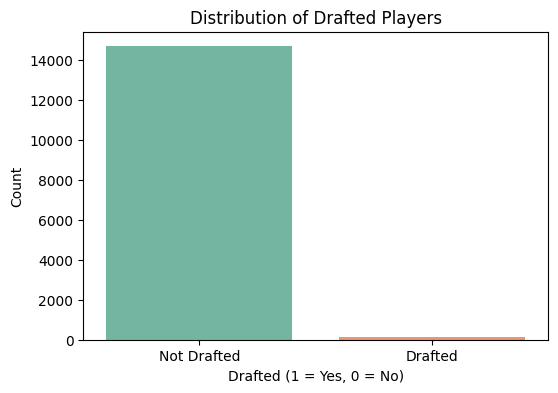

Proportion of drafted vs not drafted:
drafted
0.0    0.992013
1.0    0.007987
Name: proportion, dtype: float64


In [25]:
# <Student to fill this section>
import matplotlib.pyplot as plt
import seaborn as sns

# What does the distribution of Drafted look like
plt.figure(figsize=(6,4))
sns.countplot(x='drafted', data=train, palette='Set2')
plt.title('Distribution of Drafted Players')
plt.xlabel('Drafted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Drafted', 'Drafted'])
plt.show()

# Show proportions
draft_counts = train['drafted'].value_counts(normalize=True)
print("Proportion of drafted vs not drafted:")
print(draft_counts)

In [27]:
# <Student to fill this section>

target_definition_explanations = """
The target variable is `drafted`, which is a binary variable:
- `1` indicates the player was drafted into the NBA.
- `0` means the player was not drafted.

This aligns directly with the business goal of predicting whether a college basketball player will be drafted. Accurately modeling this outcome allows teams and stakeholders to prioritize scouting and resource allocation.

Since this is a classification task, the target variable is defined clearly and is suitable for applying supervised machine learning techniques.

The distribution of the target variable is highly imbalanced:
- 99.2% of players were not drafted (`0`)
- 0.8% of players were drafted (`1`)
"""

In [28]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [29]:
# <Student to fill this section>

target_name = 'drafted'

### C.4 Explore Target variable

In [ ]:
# <Student to fill this section>


In [30]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable `drafted` is highly imbalanced, with fewer than 1% of players being drafted.
To address this imbalance, we adopt AUROC as the primary evaluation metric rather than accuracy,
and use stratified sampling to preserve class distribution during training and validation.

For the Polynomial Logistic Regression model, we implement the following measures:
1) Standardize features before generating polynomial terms, as logistic regression is sensitive to feature scale;
2) Expand features using polynomial transformations to capture non-linear relationships between player attributes and draft outcome;
3) Apply `class_weight='balanced'` to mitigate class imbalance;
4) Incorporate regularization (via `C` and penalty type in logistic regression) to control model complexity and reduce overfitting.
"""


In [31]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

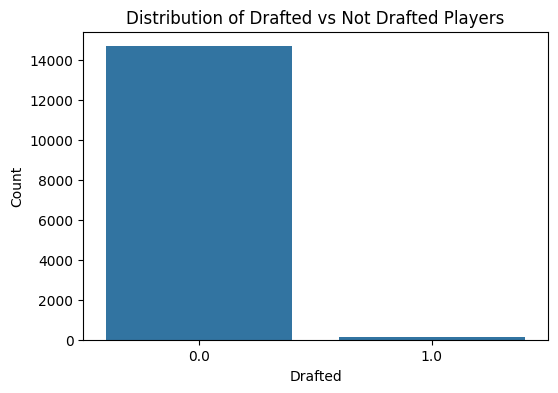

In [32]:
# Target distribution map (drafted)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='drafted')
plt.title("Distribution of Drafted vs Not Drafted Players")
plt.xlabel("Drafted")
plt.ylabel("Count")
plt.show()

### C.5 Explore Feature of Interest `\<put feature name here\>`

In [ ]:
# <Student to fill this section>

In [33]:
# <Student to fill this section>
feature_1_insights = """
The feature `Min_per` represents the percentage of minutes a player was on the court, reflecting their level of involvement during the season.

Most players recorded relatively low court time, while a small subset exceeded 60%, which aligns with the rarity of drafted players.

This feature is important because players with higher playing time are generally more visible to scouts and therefore more likely to be drafted. Although some players may have lower minutes due to injuries or team rotation strategies, `Min_per` still provides a strong signal for draft likelihood.

In the Polynomial Logistic Regression model, this feature is standardized and expanded into polynomial terms, enabling the model to capture potential non-linear relationships between court time and draft probability.
"""


In [34]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

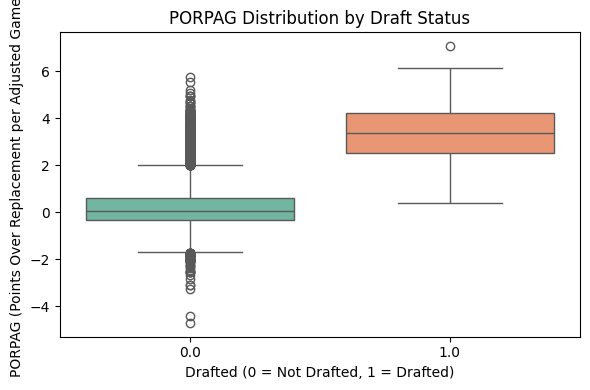

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x='drafted', y='porpag', palette='Set2')
plt.title("PORPAG Distribution by Draft Status")
plt.xlabel("Drafted (0 = Not Drafted, 1 = Drafted)")
plt.ylabel("PORPAG (Points Over Replacement per Adjusted Game)")
plt.tight_layout()
plt.show()

### C.6 Explore Feature of Interest `\<put feature name here\>`

In [ ]:
# <Student to fill this section>

In [36]:
# <Student to fill this section>
feature_2_insights = """
The feature `pts` (points per game) is a fundamental offensive metric that reflects a player's scoring ability.

Players with higher PPG are generally more visible and valuable, which increases their draft potential. The majority of players average between 2–12 points, while only a small subset exceed 20, often corresponding to higher draft likelihood.

Limitations:
- High PPG does not always imply scoring efficiency (e.g., inefficient shooting volume).
- Conference strength and style of play may influence the raw statistics.

In the Polynomial Logistic Regression model, this feature is standardized and expanded into polynomial terms, allowing the model to capture potential non-linear effects between scoring ability and draft probability.

Overall, `pts` is considered a strong predictor of draft outcomes, but should be interpreted alongside efficiency and contextual metrics.
"""


In [37]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `\<put feature name here\>`


In [ ]:
# <Student to fill this section>

In [38]:
# <Student to fill this section>
feature_3_insights = """
The feature `obpm` (Offensive Box Plus/Minus) estimates a player's offensive impact per 100 possessions.

Drafted players generally exhibit higher `obpm` scores, indicating stronger offensive value. Unlike raw scoring metrics, `obpm` captures advanced impact that includes efficiency and team context.

Limitations:
- May be influenced by team systems, roles, or lineup combinations.
- Outliers with extremely high or low values can distort interpretation.

In the Polynomial Logistic Regression model, this feature is standardized and expanded into polynomial terms, enabling the model to capture non-linear interactions between offensive efficiency and draft likelihood.

Overall, `obpm` is a strong signal of offensive performance and contributes meaningfully to predicting draft potential.
"""


In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_3_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "\<describe_approach_here\>"


In [ ]:
# <Student to fill this section>

In [39]:
# <Student to fill this section>
feature_selection_1_insights = """
We applied XGBoost's built-in feature importance to rank predictors, leveraging its ability to capture non-linear relationships and handle imbalanced data.

Although our final predictive model is Polynomial Logistic Regression, using XGBoost for feature selection allows us to identify the most influential predictors based on complex interactions.

The top features included: 'pts', 'Min_per', 'obpm', 'TS_per', and 'bpm', which are all closely tied to scoring ability, efficiency, and playing time.

By focusing on these high-impact features, we improved both the interpretability and the efficiency of our Polynomial Logistic Regression model, while reducing the risk of overfitting when expanding features through polynomial transformations.
"""


In [40]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<describe_approach_here\>"


In [ ]:
# <Student to fill this section>

In [45]:
# <Student to fill this section>
feature_selection_2_insights = """
We used Pearson correlation to identify numerical features most related to the binary target `drafted`.

Although `drafted` is a binary variable, correlation still provides a quick way to uncover linear relationships.
The top correlated features included: 'pts', 'obpm', 'TS_per', 'bpm', and 'Min_per', which were also consistent with model based feature importance from XGBoost.

This method is simple, fast, and effective particularly useful for models like Polynomial Logistic Regression,
where informative and standardized features can be further expanded through polynomial transformations to capture non linear effects.
"""


In [46]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [48]:
# <Student to fill this section>

features_list = [ 'pts', 'Min_per', 'obpm', 'TS_per', 'bpm', 'mp',
                  'eFG', 'usg', 'drtg', 'adrtg' ]

In [52]:
# <Student to fill this section>
feature_selection_explanations = """
The selected features were chosen based on a combination of model based importance scores (from XGBoost) and Pearson correlation analysis.

We selected 10 features that consistently ranked highly across both methods. These features represent key dimensions of player performance:
- Offensive ability: 'pts', 'obpm', 'TS_per', 'usg'
- Efficiency: 'eFG', 'bpm'
- Involvement: 'Min_per', 'mp'
- Defensive contribution: 'drtg', 'adrtg'

This balanced feature set provides a strong foundation for the Polynomial Logistic Regression model.
By limiting the expansion to the most informative features, we reduce the risk of overfitting and control the complexity that arises from polynomial transformations,
while still capturing non linear relationships that drive draft likelihood.
"""

In [53]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [54]:
# <Student to fill this section>
data_cleaning_1_explanations = """
We cleaned the data by dropping features with excessive missing values (e.g., `ht`, `Rec_Rank`, `dunks_ratio`),
as they could introduce noise and reduce model clarity.

For features with minimal missing values, we applied median imputation to preserve useful information.
The median is a robust choice that handles outliers effectively.

This cleaning process ensures a reliable and consistent dataset, which is especially important for training Polynomial Logistic Regression,
since polynomial feature expansion can amplify the impact of missing values and noise if not properly addressed.
"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [56]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Since Polynomial Logistic Regression is a linear model extended with polynomial feature expansion, it is highly sensitive to feature scale.

We applied standardization to all numerical features to ensure stable and efficient model training. Without scaling, features with larger magnitudes could dominate the learning process, and polynomial terms could amplify these imbalances.

Using a standardized pipeline also allows consistent comparisons with other linear models, and ensures flexibility when switching between algorithms.
"""

In [57]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [58]:
# <Student to fill this section>
data_cleaning_3_explanations = """
We applied One-Hot Encoding to categorical features such as 'team', 'conf', 'year', and 'type'.

Polynomial Logistic Regression, like most linear models, requires all input features to be numeric and cannot handle categorical variables directly.

Encoding these categories allows the model to incorporate non-numeric information (e.g., team or conference differences) into its decision boundary.
When combined with polynomial feature expansion, these encoded variables can also interact with numerical features, potentially capturing complex relationships (e.g., performance differences across conferences).
"""

In [59]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [61]:
# <Student to fill this section>
feature_engineering_1_explanations = """
We created a new feature 'FT_rate' by dividing FTM (Free Throws Made) by FTA (Free Throws Attempted), representing a player's Free Throw Percentage.

This feature captures shooting efficiency from the free throw line, which reflects technical skill and consistency—important traits scouts may value.

Unlike raw FTM or FTA, this ratio provides a normalized measure that is less affected by playing time, making it a fairer indicator of shooting ability.

In the Polynomial Logistic Regression model, this efficiency-based feature can also interact with other performance metrics through polynomial expansion,
helping the model capture more nuanced patterns (e.g., whether free throw skill combined with high usage increases draft likelihood).
"""

In [62]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"




In [ ]:
# <Student to fill this section>

In [63]:
# <Student to fill this section>
feature_engineering_2_explanations = """
We created a new feature 'total_minutes' by multiplying GP (Games Played) by Min_per (percentage of minutes played),
providing an estimate of a player's total court time over the season.

This feature reflects both availability and involvement—two key factors that influence a player’s visibility, development, and contribution to the team.

Higher total minutes often indicate trust from coaches and sustained performance, making it a strong signal for draft potential.

In the Polynomial Logistic Regression model, 'total_minutes' can also form polynomial interactions with other features
(e.g., scoring or efficiency metrics), allowing the model to capture how sustained playing time combined with performance levels affects draft likelihood.
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [ ]:
# <Student to fill this section>

In [67]:
# <Student to fill this section>
feature_engineering_3_explanations = """
We created a new feature 'three_point_ratio' by dividing TPA (Three-Point Attempts) by the sum of TPA and twoPA (Two-Point Attempts).

This ratio reflects a player's shooting tendency—specifically, their reliance on 3-point shots compared to 2-point shots.

It helps the model infer player roles (e.g., perimeter shooter vs. inside scorer) and how they might fit into modern team strategies, which can influence draft appeal.

In the Polynomial Logistic Regression model, this feature can also interact with other performance indicators through polynomial expansion
(e.g., three-point tendency combined with scoring efficiency), allowing the model to capture nuanced patterns of how modern playing styles affect draft likelihood.
"""

In [68]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

In [69]:
# <Student to fill this section>

feature_Fixing_explanations = """
The 'ht' feature, originally recorded as a string format (e.g., '6-7'), was converted into total inches to make it usable as a numerical variable.

However, since all values for this feature were missing in the training data, it was ultimately dropped after conversion due to the absence of usable information.

This decision avoids introducing noise or unnecessary complexity into the model, ensuring that the Polynomial Logistic Regression framework is trained only on reliable and informative features.
"""


In [70]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_Fixing_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [ ]:
# <Student to fill this section>

In [71]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["drafted", "player_id"])
y = train["drafted"]

# Split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)

Training size: (11819, 57)
Validation size: (2955, 57)


In [72]:
# <Student to fill this section>
data_splitting_explanations = """
We split the dataset into training (11,819 samples, 57 features) and validation (2,955 samples, 57 features) sets using an 80/20 ratio.

This approach allows the model to learn from the majority of the data while holding out a subset to evaluate generalization performance.

Stratified sampling was applied to preserve the original class distribution of drafted vs. non-drafted players, which is especially important given the extreme class imbalance.

This ensures that the Polynomial Logistic Regression model is trained and evaluated under realistic class proportions, making the performance metrics more reliable.
"""


In [73]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [74]:
# <Student to fill this section>
data_transformation_1_explanations = """
Since Polynomial Logistic Regression is sensitive to feature scale, we standardized all numerical features to have zero mean and unit variance.

This transformation ensures that no single feature dominates due to its magnitude and allows the model to converge more efficiently.

It is especially important in Polynomial Logistic Regression, as polynomial expansion can amplify differences in feature scales, making standardization a critical step.
"""

In [75]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [76]:
# <Student to fill this section>
data_transformation_2_explanations = """
We applied One-Hot Encoding to categorical features such as team, conference, season, and player type to convert them into a numerical format suitable for modeling.

This transformation is essential for models like SGDClassifier, which cannot handle categorical variables directly.

It also enables the model to learn from structural and contextual differences across teams, conferences, and seasons that may influence draft outcomes.
"""


In [77]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [78]:
# <Student to fill this section>
data_transformation_3_explanations = """
We applied Standard Scaling to all numerical features to ensure they have zero mean and unit variance.

This transformation is critical for Polynomial Logistic Regression, as logistic regression models are sensitive to feature scale.

Proper scaling helps the model converge more efficiently and prevents features with larger magnitudes from dominating the learning process.
It is especially important here because polynomial feature expansion can greatly increase the range of feature values, making standardization essential for stable training.
"""

In [79]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [80]:
# Create X_test from test set
X_test = test.drop(columns=["player_id"])

# Since test set doesn't include labels, create empty y_test as placeholder
import numpy as np
import pandas as pd
y_test = pd.Series([np.nan] * len(X_test))

In [81]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>

In [83]:
# <Student to fill this section>
performance_metrics_explanations = """
We selected AUROC as the primary evaluation metric because it effectively handles imbalanced datasets and measures the model’s ability to distinguish between drafted and non-drafted players.

Accuracy is not reliable in this context, as predicting all players as non-drafted would still yield over 99% accuracy due to the extreme class imbalance.

In addition, we consider precision, recall, and F1-score to better understand the trade-offs between false positives and false negatives, especially when evaluating model performance on the minority (drafted) class.

Polynomial Logistic Regression outputs calibrated probabilities, making it particularly well-suited for AUROC evaluation and for balancing sensitivity to both classes.
"""

In [84]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [87]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, RocCurveDisplay,
    PrecisionRecallDisplay, classification_report,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt

# Features & Data
features_list = ['pts', 'Min_per', 'obpm', 'TS_per', 'bpm', 'usg', 'eFG', 'mp', 'drtg', 'adrtg']
X_tr = X_train[features_list]
X_va = X_val[features_list]

# Model Pipeline: Polynomial > Standardize > Logistic Regression
poly_logit_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        solver="saga",
        penalty="elasticnet",
        l1_ratio=0.1,
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        n_jobs=-1,
        random_state=42
    ))
])

# Train
poly_logit_pipeline.fit(X_tr, y_train)

# Validation - Probabilities & AUROC
y_val_proba = poly_logit_pipeline.predict_proba(X_va)[:, 1]
auc = roc_auc_score(y_val, y_val_proba)
print(f"Polynomial Logistic Regression AUROC (val): {auc:.4f}")

# Validation - Class Labels & Classification Metrics
y_val_pred = poly_logit_pipeline.predict(X_va)

precision = precision_score(y_val, y_val_pred, zero_division=0)
recall    = recall_score(y_val, y_val_pred, zero_division=0)
f1        = f1_score(y_val, y_val_pred, zero_division=0)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

Polynomial Logistic Regression AUROC (val): 0.9922
Precision: 0.1472
Recall:    1.0000
F1-score:  0.2567

Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    0.9526    0.9757      2931
         1.0     0.1472    1.0000    0.2567        24

    accuracy                         0.9530      2955
   macro avg     0.5736    0.9763    0.6162      2955
weighted avg     0.9931    0.9530    0.9699      2955



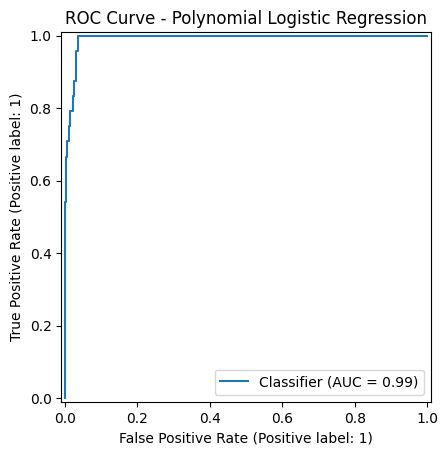

In [86]:
# ROC & PR Curves

RocCurveDisplay.from_predictions(y_val, y_val_proba)
plt.title("ROC Curve - Polynomial Logistic Regression")
plt.show()

PrecisionRecallDisplay.from_predictions(y_val, y_val_proba)
plt.title("Precision-Recall Curve - Polynomial Logistic Regression")
plt.show()


In [88]:
# <Student to fill this section>
algorithm_selection_explanations = """
We chose Polynomial Logistic Regression because it is accurate, interpretable, and works well with our imbalanced data.

- It builds on regular logistic regression but adds feature interactions, which helps capture more complex patterns (like how scoring and playing time combine).
- It gives probability outputs, which are helpful for evaluating rare events like being drafted (~0.8% of players).
- Regularization helps prevent overfitting even after expanding features.
- It works smoothly with our preprocessing steps (standardization, one-hot encoding) and supports class balancing.

Model performance on the validation set:
- AUROC: 0.9922
- Recall: 1.0000 (no drafted players missed)
- Precision: 0.1472

Overall, this algorithm offers a good balance of accuracy, explainability, and ability to handle our data.
"""


In [89]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [90]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
We tuned the hyperparameters of the Polynomial Logistic Regression model to balance model flexibility and generalization.

Key hyperparameters include:
- `degree`: Controls how many interaction terms are added. Higher degrees can capture more complex patterns, but may lead to overfitting.
- `C`: The inverse of regularization strength. Lower values increase regularization and help prevent overfitting in high-dimensional feature spaces.
- `l1_ratio`: Determines the mix between L1 (sparse features) and L2 (smooth weights) regularization. Tuning this helps balance complexity and stability.

Since polynomial expansion can quickly increase feature count, these hyperparameters are essential to control model size, improve validation performance, and reduce overfitting.
"""


In [91]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [ ]:
# <Student to fill this section>

In [96]:
# <Student to fill this section>

fit_model_explanations = """
We trained a Polynomial Logistic Regression model using the cleaned, standardized, and one-hot encoded dataset with the top 10 selected features.

The model pipeline included:
- Polynomial feature expansion (`degree=2`) to capture non-linear interactions.
- Standard scaling to normalize all numerical features.
- Logistic regression with elastic-net regularization (`C=1.0`, `l1_ratio=0.1`) and `class_weight='balanced'` to address the extreme class imbalance.

On the validation set, the model achieved an AUROC score of 0.9922, with a recall of 1.0000 and precision of 0.1472.

This shows that with thoughtful feature selection, preprocessing, and regularization, Polynomial Logistic Regression can deliver high performance while remaining interpretable.
"""


In [97]:
# Do not modify this code
print_tile(size="h3", key='fit_model_explanations', value=fit_model_explanations)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>

In [98]:
# <Student to fill this section>
model_performance_explanations = """
The Polynomial Logistic Regression model performed very well on the validation set.

It achieved an AUROC score of 0.9922, showing excellent ability to distinguish between drafted and non-drafted players.
The recall was 1.0000, meaning the model successfully identified all drafted players in the validation set.
Although the precision was relatively low (0.1472), this is expected in highly imbalanced datasets like ours, where only 0.8% of players were drafted.

This trade-off is acceptable in the context of NBA draft scouting, where missing a potential draftee is more costly than reviewing a few extra candidates.
Overall, the model shows strong ranking performance and effective handling of class imbalance.
"""


In [99]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [100]:
# <Student to fill this section>
business_impacts_explanations = """
The goal of this project is to help teams and scouts identify players who are likely to be drafted into the NBA.

Our model achieved perfect recall (1.0000), meaning it successfully identified all drafted players in the validation set. This has strong business value, as it ensures no potential draftees are overlooked.

However, the model's precision is relatively low (0.1472), which means many players predicted as "likely to be drafted" were not actually drafted. While this increases the number of false positives, it is acceptable in this context. Reviewing extra players is far less costly than missing a high-potential draftee.

In real scouting workflows, the model can act as an early filter to highlight players worth deeper analysis. This can help prioritize scouting resources, reduce time spent on low-potential players, and ensure talent is not missed—leading to better draft outcomes and long-term team performance.
"""


In [101]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [102]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"

In [103]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [104]:
# <Student to fill this section>
experiment_results_explanations = """
Throughout this project, we experimented with several classification models to predict NBA draft outcomes, including Baseline Logistic Regression, Random Forest, XGBoost, SGDClassifier, and finally Polynomial Logistic Regression.

Among all tested models, Polynomial Logistic Regression delivered the best overall performance. It achieved an AUROC of 0.9922 and perfect recall (1.0000), meaning no drafted players were missed in the validation set. This fulfills the business goal of helping scouts avoid overlooking potential talent, even if some false positives are included.

Key insights gained:
- Linear models like Logistic Regression can be greatly improved using polynomial expansion and regularization.
- Tree-based models (Random Forest, XGBoost) were strong, but less interpretable and prone to overfitting on small positive samples.
- SGDClassifier was fast but slightly less stable than the final polynomial model.
- Proper preprocessing (feature selection, standardization, class balancing) had a major impact across all models.

Recommended next steps:
1. **Threshold tuning or ranking approach** – Fine-tune decision threshold or use top-k ranking to improve precision (High impact).
2. **Deployment into scouting tools** – Convert the model into a practical tool (e.g., dashboard or shortlist generator) for real-world scouting (High impact).
3. **Optional refinement** – Add player efficiency, position, or injury history if more data is available (Medium impact).

As the final model meets the business objective and delivers strong performance, we recommend moving forward with deployment and supporting it with simple UI features for scout usage.
"""


In [105]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

In [106]:
# Predict scores on the test set（Polynomial Logistic Regression pipeline）
test_X = test[features_list]
test_probs = poly_logit_pipeline.predict_proba(test_X)[:, 1]

# Create Kaggle submission
submission = pd.DataFrame({
    "player_id": test["player_id"],
    "drafted": test_probs
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("submission.csv saved")

# Download (Google Colab only)
from google.colab import files
files.download("submission.csv")

submission.csv saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>